# DAY_055

### 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

%matplotlib inline

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_init', KMeans(n_clusters=3, n_init=12, init='random'))]

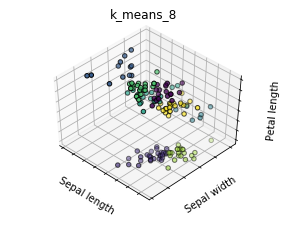

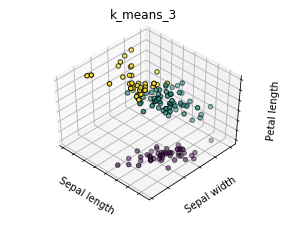

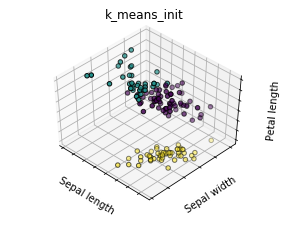

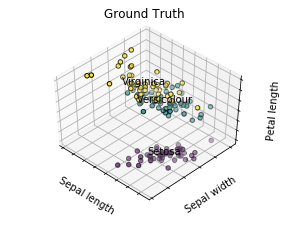

In [11]:
fignum = 1
titles = ['k_means_8', 'k_means_3', 'k_means_init']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4,3))
    ax = Axes3D(fig, rect=[0,0, .95, 1], elev=48, azim=134)
    
    est.fit(X)
    labels = est.labels_
    
    ax.scatter(X[: ,0], X[:, 1], X[:, 2], c=labels.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_zlabel('Petal length')
    
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
       
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                   ('Versicolour', 1),
                   ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
             X[y == label, 1].mean(),
             X[y == label, 2].mean(), name,
             horizontalalignment='center',
             bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
ax.scatter(X[: ,0], X[:, 1], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

ax.set_title('Ground Truth')
ax.dist = 12
    